## Notebook 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

It happens to anyone writing code: occasionally, you make errors. Errors in your code, known as bugs, can be roughly divided in two kinds. The first kind are syntax errors, where Python throws an error message at you. Once you have resolved all the syntax errors, this means your code will run, but it doesn't mean, unfortunatley, that you get the answer you want. There may be one or more bugs remaining in your logic. To find these bugs, it often helps to test small parts of the code separately and to write lots of print statements. There also exist tools called debuggers, which help you in stepping through the code to look at intermediate results. They do not, unfortunately, tell you what the bug is, that is still up to you, the programmer. 

In this Notebook, we will discuss a number of syntax errors. Syntax errors can be very long as they provide a traceback from the function that throws the error all the way back to the code that you wrote. The strategy to find out what is going on is to read the last sentence of the error message. This error message is designed to tell you what you are doing wrong. Sometimes it is easy for Python to figure out what is wrong and the error message is very informative. Other times you make a more confusing error and Python throws an error message that doesn't help much in explaining what you did wrong. A second important piece of information is that Python shows you in what line of your code things went haywire. It prints a few lines of your code to the screen and points to the line where the error occurred with an arrow. 

This Notebook is by no means exhaustive. A number of syntax errors are discussed so that you may start recognizing them and give you some practice in trying to resolve errors. 

### `IndexError: list index out of range`
As a first example, run the code below

In [3]:
x = [1, 2, 3]
for i in range(3):
    print(x[i])

1
2
3


You will get an error message `IndexError: list index out of range` and an arrow at the line of the code where this happened. This makes immediate sense, as the length of the array `x` is 3 (so `x[0]`, `x[1]`, and `x[2]`), while you are trying to print `x[3]`. Fix the code and run it again.

### `invalid syntax`
A common error message is `invalid syntax`. This means you are trying to do something that Python doesn't understand. This could very well be a typo, which you can often spot by looking carefully at the code. For example, run the code below

In [5]:
a = 7 
if a == 8:
    print('the value of a equals 8')

Similarly, if you forget to add a colon, you get a `invalid syntax` error. Python shows with the carrot (`^`) where it doesn't understand what is going on.

In [6]:
avalue = 7 
if avalue < 10:
    print('the value of avalue is smaller than 10')

the value of avalue is smaller than 10


In this case, the error is that the statement `a = 8` needs to have two equal signs. Fix it and run the code again. 

Other times, the syntax error may not be so obvious, for example, in the code below 

Text(0.5,1,'Nice plot')

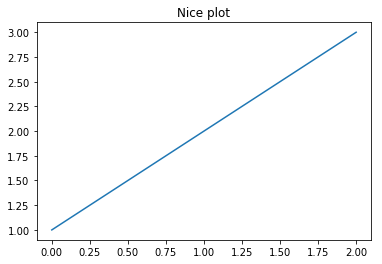

In [8]:
plt.plot([1,2,3])
plt.title('Nice plot')

You can stare all you want at the line `plt.title('Nice plot')` but it looks perfectly good. And it is! The problem lies with the line just above it, where the closing parenthesis is missing. Python thinks that the plotting statement continuous on the next line, but the `plt.title` command makes no sense in the `plt.plot` function, so it throws an error message. There is not much else it can do. Fix the parenthesis and run the code again. 

### Longer error messages
Error messages can be rather long, depending where in the code the error occurs. In the code below, the error occurs in the line `plt.plot(xdata, ydata)`, which calls a function in the `matplotlib` package, which throws the error when it tries to plot `y` vs. `x` (which is a generic error message from `matplotlib`; it doesn't substitute the names of the arrays you really want to plot). Run the code

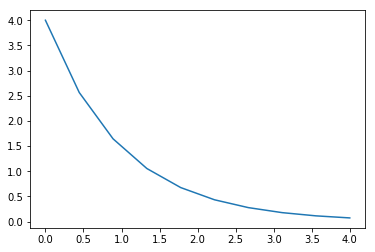

In [11]:
def func_exp(x, a=2, b=3):
    y = b * np.exp(-a * x)
    return y

xdata = np.linspace(0, 4, 10)
ydata = func_exp(xdata, b=4, a=1)

plt.plot(xdata, ydata);

Again, the code looks perfectly fine, but `matplotlib` complains that `x and y must not be None`. Note that `x` and `y` refer to `xdata` and `ydata`, because that is the statement in the code. Apparently, either `xdata` or `ydata` equals `None`. The thing to do here is to print `xdata` and `ydata` to the screen. 

In [12]:
print(xdata)
print(ydata)

[0.         0.44444444 0.88888889 1.33333333 1.77777778 2.22222222
 2.66666667 3.11111111 3.55555556 4.        ]
[4.         2.56472155 1.64444916 1.05438855 0.67605326 0.43347209
 0.2779338  0.1782057  0.114262   0.07326256]


As you see, it turns out that `xdata` is indeed an array with 10 values, but `ydata` is `None`. The error lies in the function `func_exp` that is defined. This function doesn't return the value of `y` that is computed. Fix the function and run the code again. 

### Exercises
The best way to learn how to resolve errors in your code is by practice.
Consider the following code snippets. Each code snippet contains one or two syntactical errors. It is up to you to fix the error so that the code runs properly. Note that you will need to make changes to only one or two lines in each code snippet. 

### Exercise 1 <a name="back1"></a>

Text(0.5,1,'Nice Python figure!')

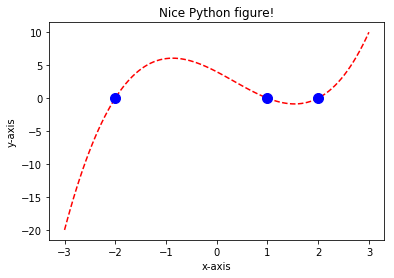

In [15]:
xvalues = np.linspace(-3, 3, 100)

y = (xvalues + 2) * (xvalues - 1) * (xvalues - 2)
plt.plot(xvalues, y, 'r--')
plt.plot([-2, 1, 2], [0 ,0, 0], 'bo', markersize=10)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Nice Python figure!')

### Exercise 2 <a name="back2"></a>

Text(0,0.5,'f(x)')

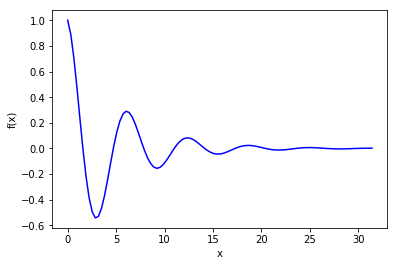

In [19]:
def test(x, alpha=1):
    return np.exp(-alpha * x) * np.cos(x)
x = np.linspace(0, 10*np.pi, 100)
alpha = 0.2
y = test(x,alpha=alpha)
plt.plot(x, y, 'b')
plt.xlabel('x')
plt.ylabel('f(x)')

### Exercise 3 <a name="back3"></a>

In [23]:
temperature = np.loadtxt('rome_temp.dat')
temperature


array([ 8.,  9., 10., 13., 17., 21., 24., 24., 21., 17., 12.,  9.])

Text(0,0.5,'temperature (Celcius)')

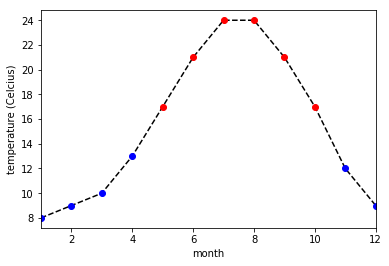

In [25]:
plt.plot(np.arange(1, 13), temperature, 'k--')
for i in range(len(temperature)):
    if temperature[i] < 15:
        plt.plot(i + 1, temperature[i], 'bo')
    else:
        plt.plot(i + 1, temperature[i], 'ro')
plt.xlim(1, 12)
plt.xlabel('month')
plt.ylabel('temperature (Celcius)')

### Exercise 4 <a name="back4"></a>

In [27]:
a = np.array([2, 2, 4, 2, 4, 4])

for i in range(len(a)):
    if a[i] < 3:  # replace value with 77 when value equals 2
        a[i] = 77
    else:  # otherwise replace value with -77
        a[i] = -77
print('modified a:' a)

SyntaxError: invalid syntax (<ipython-input-27-cf23866a4efb>, line 8)

### Exercise 5 <a name="back5"></a>

In [ ]:
y = np.zeros(20, 20)
y[8:13] = 10
plt.matshow(y)
plt.title(image of array y);